<a href="https://colab.research.google.com/github/PatanArshiya/ProjectsArshiya/blob/main/Credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
file_path = '/content/creditcard.csv'
pd.read_csv(file_path)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df = pd.read_csv(file_path)
rows,coloums=df.shape
print(f"The dataset contains {rows}  rows and {coloums} columns.")
print("Column names:")
for col in df.columns:
    print(col)

The dataset contains 284807  rows and 31 columns.
Column names:
Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


In [ ]:
class_counts = df['Class'].value_counts()
print(f"\nClass 0: {class_counts[0]} normal transactions")
print(f"Class 1: {class_counts[1]} fraudulent transactions")


Class 0: 284315 normal transactions
Class 1: 492 fraudulent transactions


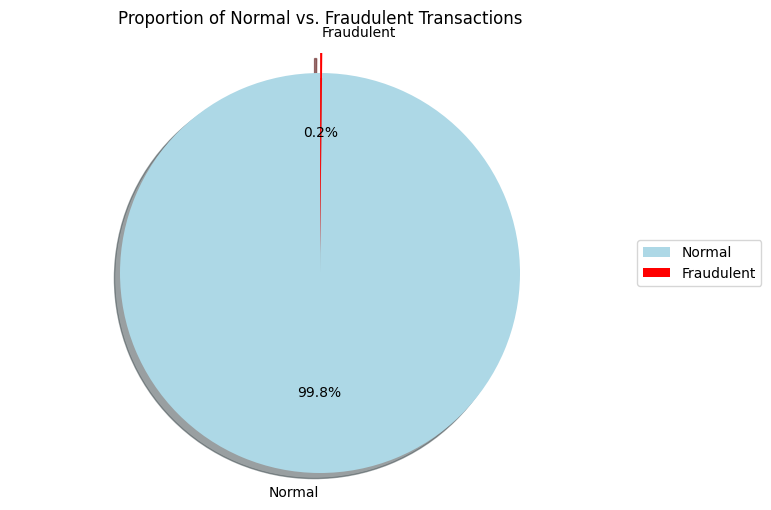

In [ ]:
# Create pie chart
class_counts = df['Class'].value_counts()
labels = ['Normal', 'Fraudulent']
sizes = [class_counts[0], class_counts[1]]
colors = ['lightblue', 'red']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proportion of Normal vs. Fraudulent Transactions')
plt.axis('equal')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

[[56854    10]
 [   43    55]]
Accuracy: 0.9990695551420246


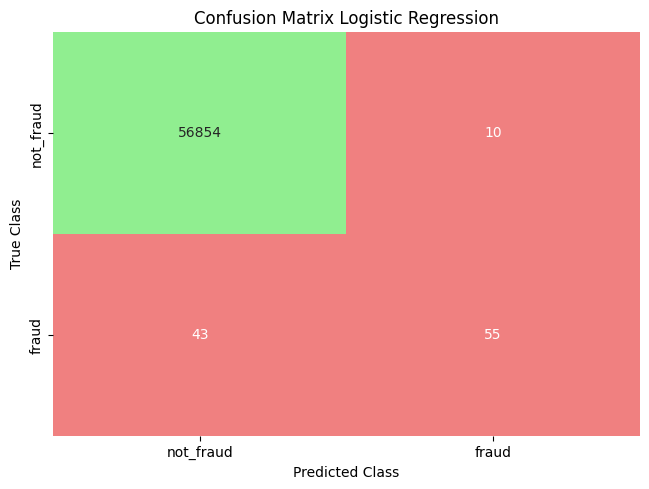

In [ ]:
# Train a logistic regression model

missingvalues = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(missingvalues.fit_transform(df), columns=df.columns)
data_imputed['Class'] = data_imputed['Class'].astype(int)
X = data_imputed.drop('Class', axis=1)
y = data_imputed['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
#--> CM matrix for Logistic Regression
matrix_lr = confusion_matrix(y_test, y_pred)
cm_lr = pd.DataFrame(matrix_lr, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['lightcoral', 'lightgreen'])
sns.heatmap(cm_lr, annot=True, cbar=None, cmap=cmap, fmt = 'g')
plt.title("Confusion Matrix Logistic Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


SVM Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.79      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962

[[56847    17]
 [   21    77]]
Accuracy: 0.9993328885923949


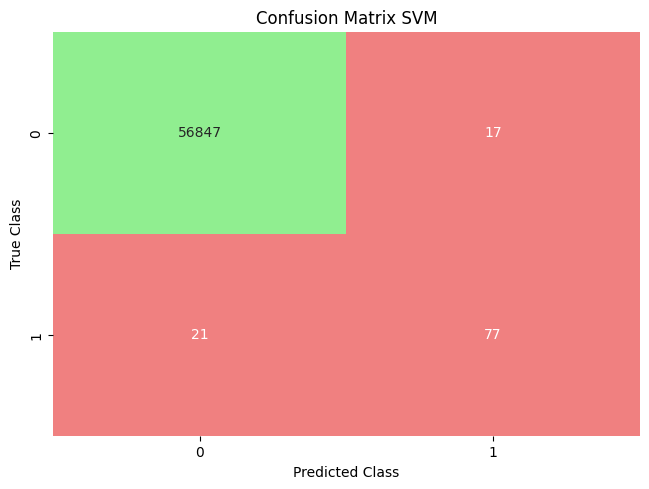

In [ ]:
# Train an SVM model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data_imputed.drop('Class', axis=1)
y = data_imputed['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
# Evaluate the SVM model
print("\nSVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print('Accuracy:', accuracy_score(y_test, y_pred_svm))

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['lightcoral', 'lightgreen'])

# create the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# use the confusion matrix cm_svm in the heatmap
sns.heatmap(cm_svm, annot=True, cbar=None, cmap=cmap, fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

The dataset contains 284807  rows and 31 columns.
Column names:
Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


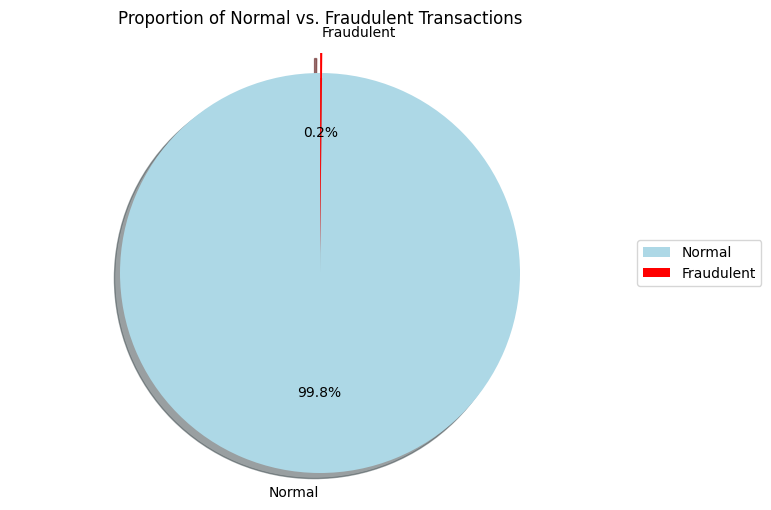

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

[[56854    10]
 [   43    55]]
Accuracy: 0.9990695551420246


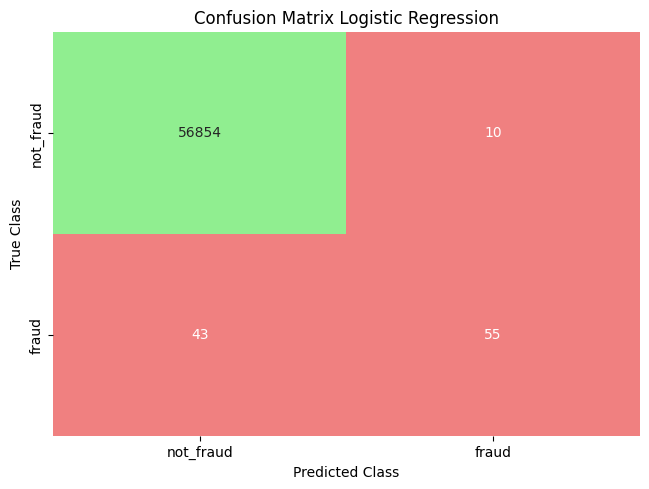


SVM Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.79      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962

[[56847    17]
 [   21    77]]
Accuracy: 0.9993328885923949


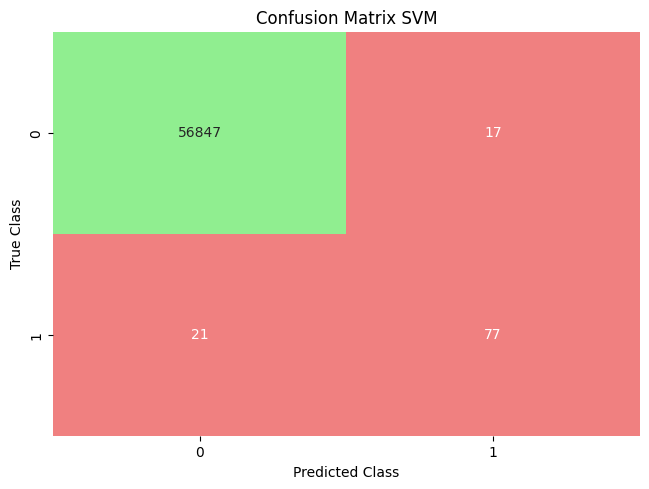

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
file_path = '/content/creditcard.csv'
pd.read_csv(file_path)
df = pd.read_csv(file_path)
rows,coloums=df.shape
print(f"The dataset contains {rows}  rows and {coloums} columns.")
print("Column names:")
for col in df.columns:
    print(col)

    # Create pie chart
class_counts = df['Class'].value_counts()
labels = ['Normal', 'Fraudulent']
sizes = [class_counts[0], class_counts[1]]
colors = ['lightblue', 'red']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proportion of Normal vs. Fraudulent Transactions')
plt.axis('equal')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# Train a logistic regression model

missingvalues = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(missingvalues.fit_transform(df), columns=df.columns)
data_imputed['Class'] = data_imputed['Class'].astype(int)
X = data_imputed.drop('Class', axis=1)
y = data_imputed['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
#--> CM matrix for Logistic Regression
matrix_lr = confusion_matrix(y_test, y_pred)
cm_lr = pd.DataFrame(matrix_lr, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['lightcoral', 'lightgreen'])
sns.heatmap(cm_lr, annot=True, cbar=None, cmap=cmap, fmt = 'g')
plt.title("Confusion Matrix Logistic Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


# Train an SVM model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data_imputed.drop('Class', axis=1)
y = data_imputed['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
# Evaluate the SVM model
print("\nSVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print('Accuracy:', accuracy_score(y_test, y_pred_svm))

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['lightcoral', 'lightgreen'])

# create the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# use the confusion matrix cm_svm in the heatmap
sns.heatmap(cm_svm, annot=True, cbar=None, cmap=cmap, fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()